In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf 
import numpy as np
from chainconsumer import ChainConsumer
import cmasher as cmr

'unset XLA_FLAGS'


Populating the interactive namespace from numpy and matplotlib


2023-10-26 11:55:45.151576: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


'unset XLA_FLAGS'

## Load data

In [3]:
import pickle
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_mse.pkl", 'rb') as g:
    sample_nd_mse = pickle.load(g)
    
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_vmim.pkl", 'rb') as g:
    sample_nd_vmim = pickle.load(g)
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_mae.pkl", 'rb') as g:
    sample_nd_mae = pickle.load(g) 

    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_gnll.pkl", 'rb') as g:
    sample_nd_gnll = pickle.load(g) 


In [4]:
col = cmr.eclipse([0.,0,0.55,0.85]) 
fid_params=np.array([0.2664, 0.0492, 0.831,0.6727,0.9645, -1.0])
name_parameters= ['$\Omega_c$', '$\Omega_b$', '$\sigma_8$', '$h_0$', '$n_s$', '$w_0$']

In [5]:
import seaborn as sn
palette1=sn.color_palette("blend:#7AB,#EDA")
palette2=sn.color_palette("viridis")
palette3=sn.color_palette("magma")

In [6]:
palette1

[(0.4666666666666667, 0.6666666666666666, 0.7333333333333333),
 (0.56, 0.7066666666666667, 0.72),
 (0.6533333333333333, 0.7466666666666667, 0.7066666666666667),
 (0.7466666666666666, 0.7866666666666666, 0.6933333333333332),
 (0.8400000000000001, 0.8266666666666667, 0.6799999999999999),
 (0.9333333333333333, 0.8666666666666667, 0.6666666666666666)]

In [7]:
palette2

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [8]:
palette3

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

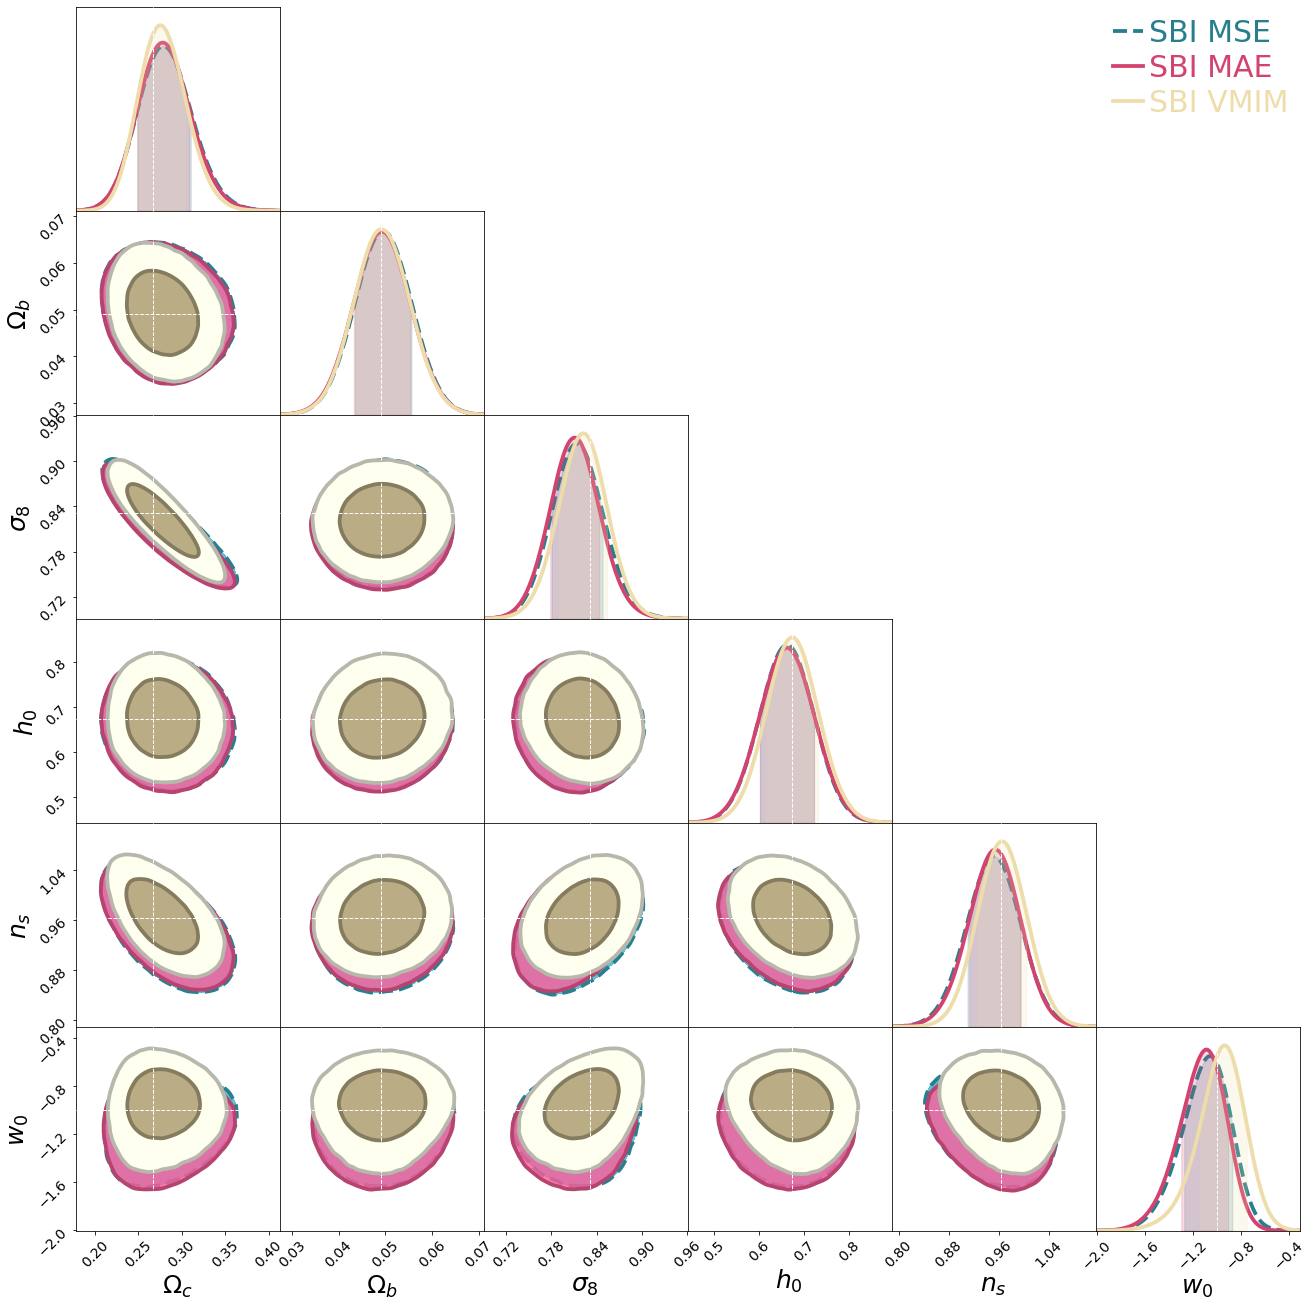

In [9]:
c = ChainConsumer()

c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MSE')
c.add_chain([sample_nd_mae[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MAE')
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI VMIM')
c.configure(shade=True,legend_kwargs={'fontsize': 30}, linewidths=3.8,linestyles=["--", "-", "-"], shade_alpha=[0.8, 0.8, 1], bar_shade=True, flip=False, colors=[array(palette2[2]),array(palette3[3]),array(palette1[5])], tick_font_size=14, label_font_size=25)
c.configure_truth(color='w', ls="--", linewidth=1.0)
fig = c.plotter.plot(truth=fid_params, figsize=2.0, )
fig.set_size_inches(2 + fig.get_size_inches())

#plt.savefig('../figures/contours_posterior_loss.pdf')

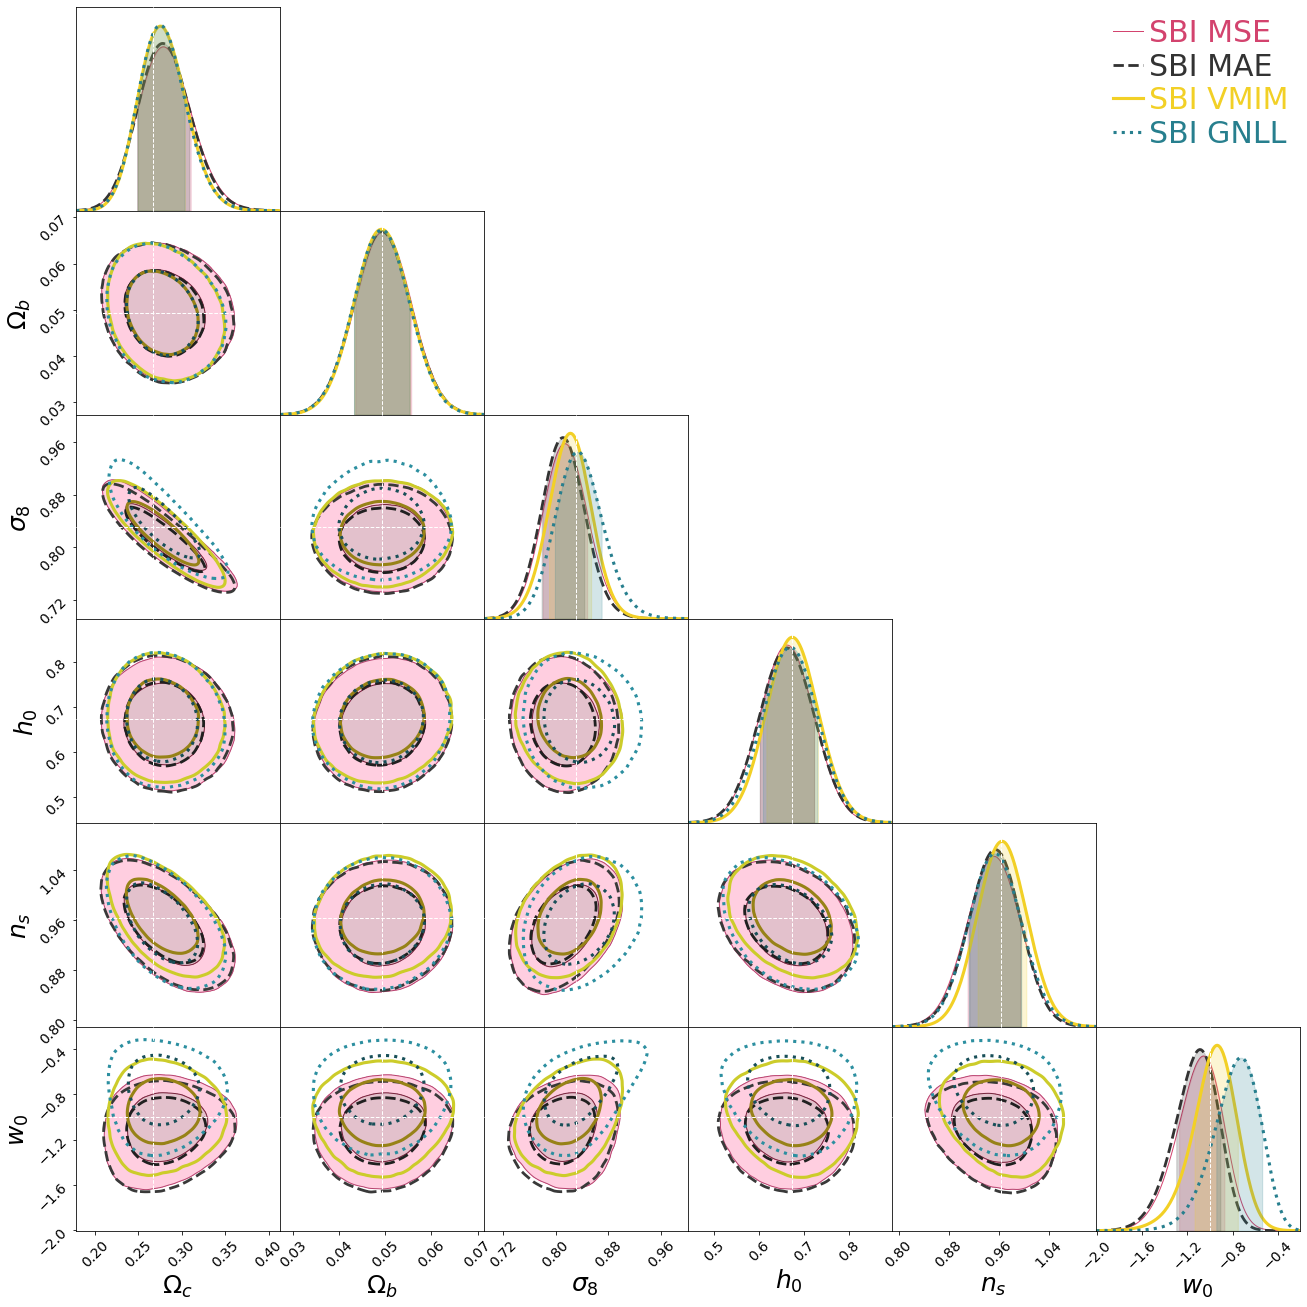

In [10]:
c = ChainConsumer()
c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MSE')
c.add_chain([sample_nd_mae[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MAE')
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI VMIM')
c.add_chain([sample_nd_gnll[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI GNLL')
c.configure(shade=[True, False,False,False],legend_kwargs={'fontsize': 30},linewidths=[1, 2.8, 3.1,3.1], linestyles=["-", "--", "-", ':'], shade_alpha=[0.3, 0.8, 1, 1], bar_shade=True, flip=False, colors=[array(palette3[3]),'k','yellow',array(palette2[2])], tick_font_size=14, label_font_size=25)
c.configure_truth(color='w', ls="--", linewidth=1.0)
fig = c.plotter.plot(truth=fid_params, figsize=2.0, )
fig.set_size_inches(2 + fig.get_size_inches())

plt.savefig('../figures/contours_posterior_loss_dashed.pdf')

